# Entendimento do problema

Se trata de um tratamento de dados para ajudar a melhor vizualização de uma coleta de avaliações de determinadas amostras. <br>
A coleta foi realizada por uma discente do curso de engenharia de alimentos, com o objetivo de ver e etender a os resultados de sua amostra.

# Entendendo os dados
Os dados foram anotados em duas abas de uma planilha do excel com as seguintes informações


| Variable Name|     Description    | Tipo  |
| --------- |:---------------------:| -----:|
| Provadores| código do provador    |inteiro|
|     Cor   |   0 a 9               |inteiro|
| Aroma     |     0 a 9             |inteiro|
|  Sabor    |  0 a 9                |inteiro|
| Textura   |     0 a 9             |inteiro|
|Impressão Global|   0 a 9          |inteiro|
|Inteção de compra| 1 a 5           |inteiro|

## Carregando pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

## Carregando Dados

In [2]:
df365 = pd.read_excel("Pasta1.xlsx", "365")
df679 = pd.read_excel("Pasta1.xlsx", "679")

In [3]:
df365.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,,Unnamed: 7
0,NaN,Provadores,Cor,Aroma,Sabor,Textura,Impressão global,Intenção de compra
1,NaN,1,9,7,5,8,8,3
2,NaN,2,8,7,9,9,9,5
3,NaN,3,8,7,8,9,8,4
4,NaN,4,8,5,7,7,8,3


In [4]:
 df679.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Provadores,Cor,Aroma,Sabor,Textura,Impressão global,Intenção de compra
1,NaN,1,9,6,5,7,8,3
2,NaN,2,7,7,8,8,9,5
3,NaN,3,8,7,7,9,7,4
4,NaN,4,8,5,6,7,7,3


In [5]:
df365.shape , df679.shape

((106, 8), (102, 8))

Percebesse que os dados estão fora de formato para serem analisados esporadicamente, para isso requer uma limpeza inicial 

## Preparação dos dados 

In [6]:
df365.columns = ["rr", "PROVADORES", "COR", "AROMA", "SABOR", "TEXTURA", "IMPRESSÃO GLOBAL", "INTENÇÃO DE COMPRA"]
df679.columns = ["rr", "PROVADORES", "COR", "AROMA", "SABOR", "TEXTURA", "IMPRESSÃO GLOBAL", "INTENÇÃO DE COMPRA"]

In [7]:
df365 = df365.drop( index = 0, columns= ["rr","PROVADORES"])
df679 = df679.drop( index = 0, columns= ["rr", "PROVADORES"])

In [8]:
df365 = df365[0:100]
df679 = df679[0:100]

In [9]:
df365.head()

,COR,AROMA,SABOR,TEXTURA,IMPRESSÃO GLOBAL,INTENÇÃO DE COMPRA
1,9,7,5,8,8,3
2,8,7,9,9,9,5
3,8,7,8,9,8,4
4,8,5,7,7,8,3
5,7,8,8,8,8,3


In [10]:
df679.head()

,COR,AROMA,SABOR,TEXTURA,IMPRESSÃO GLOBAL,INTENÇÃO DE COMPRA
1,9,6,5,7,8,3
2,7,7,8,8,9,5
3,8,7,7,9,7,4
4,8,5,6,7,7,3
5,7,8,8,8,8,3


In [11]:
df365.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COR                 100 non-null    object
 1   AROMA               100 non-null    object
 2   SABOR               100 non-null    object
 3   TEXTURA             100 non-null    object
 4   IMPRESSÃO GLOBAL    100 non-null    object
 5   INTENÇÃO DE COMPRA  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [12]:
df679.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   COR                 100 non-null    object
 1   AROMA               100 non-null    object
 2   SABOR               100 non-null    object
 3   TEXTURA             100 non-null    object
 4   IMPRESSÃO GLOBAL    100 non-null    object
 5   INTENÇÃO DE COMPRA  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [13]:
df679.shape, df365.shape

((100, 6), (100, 6))

# Modelagem

Nesse ponto vamos selecionar as variáveis e selecionar os modelos de avaliação  que serão. <br>
- Analise de variância(ANOVA)
- Comparativo de médias


## Analise de variância

Para realizar a ANOVA precisamos definir alguns critérios que serão avaliados no final da analise:
 - As amostras possuem os atributos iguais entre si.
 - Pelo menos uma amostra possui um atributo diferente

In [16]:
df365.var()

COR                   1.421818
AROMA                 2.224646
SABOR                 1.795859
TEXTURA               0.936869
IMPRESSÃO GLOBAL      1.309495
INTENÇÃO DE COMPRA    0.462222
dtype: float64

In [17]:
df679.var()

COR                   1.087980
AROMA                 2.141818
SABOR                 2.191919
TEXTURA               0.959495
IMPRESSÃO GLOBAL      1.401515
INTENÇÃO DE COMPRA    0.462222
dtype: float64

In [18]:
var679 = list()
var679 = [round(df679.var()[1],2), 
          round(df679.var()[2],2), 
          round(df679.var()[3],2), 
          round(df679.var()[4],2), 
          round(df679.var()[5],2)]

var365 = list()
var365 = [round(df365.var()[1],2), 
          round(df365.var()[2], 2), 
          round(df365.var()[3],2), 
          round(df365.var()[4],2), 
          round(df365.var()[5],2)]

In [19]:
df679["SABOR"].value_counts()

7    30
8    26
6    19
9    16
5     4
2     3
4     2
Name: SABOR, dtype: int64

In [20]:
df365["TEXTURA"].value_counts()

8    46
7    30
9    16
6     4
5     3
4     1
Name: TEXTURA, dtype: int64

In [21]:
categories = ["COR", "AROMA", "SABOR","TEXTURA", "IMPRESSÃO GLOBAL"]

365 = VERDE, 679 = VERMELHO

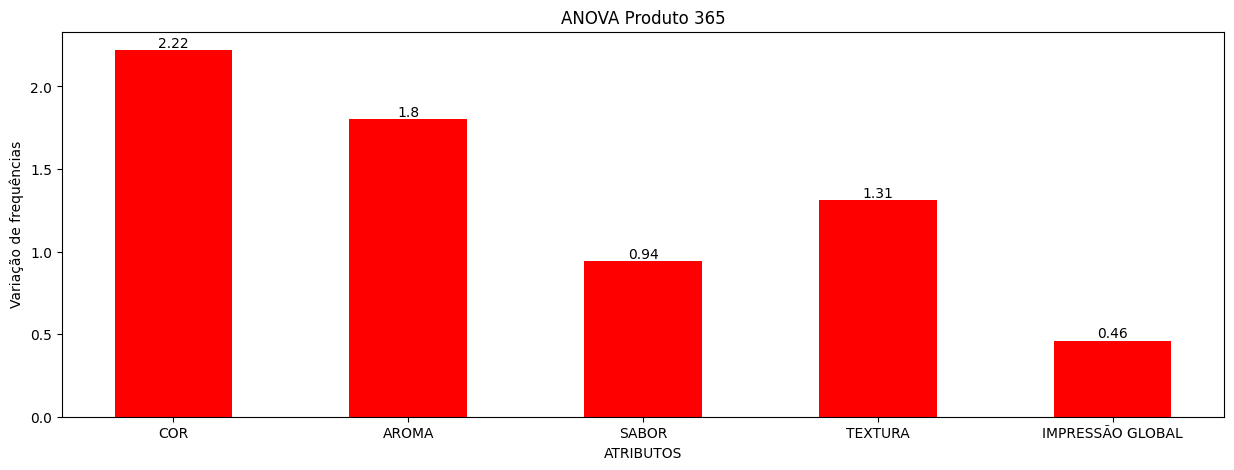

In [22]:
fig, ax = plt.subplots(figsize=[15,5])

v = ax.bar(categories, var365, width=0.5, color="r")
#ax.bar(categories, var365, width=0.5, color="r")
ax.set_xlabel("ATRIBUTOS")
ax.set_ylabel("Variação de frequências")
ax.set_title("ANOVA Produto 365")
ax.bar_label(v)
plt.show()

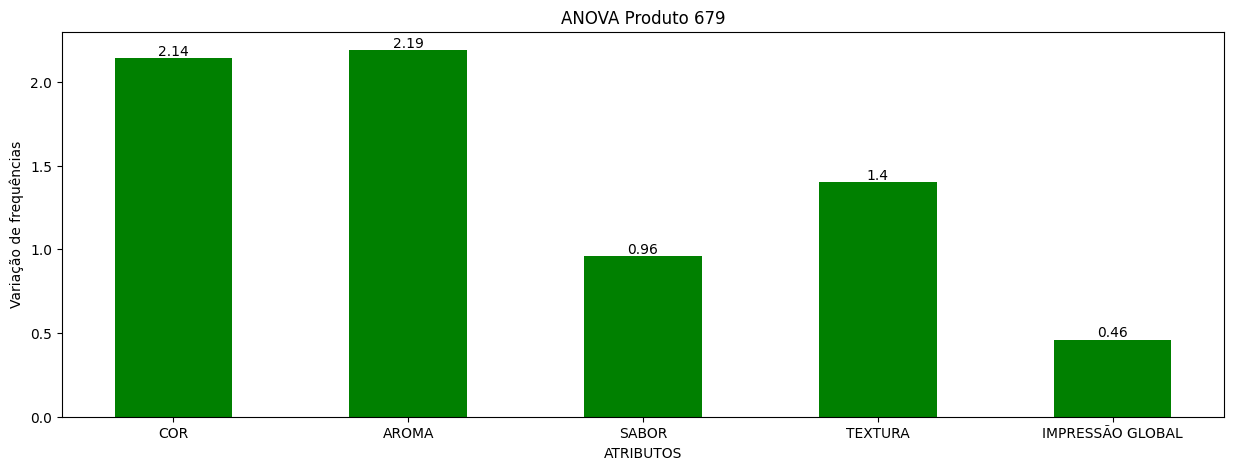

In [23]:
fig, ax = plt.subplots(figsize=[15,5])

v = ax.bar(categories, var679, width=0.5, color="g")
#ax.bar(categories, var679, width=0.5, color="g")
ax.set_xlabel("ATRIBUTOS")
ax.set_ylabel("Variação de frequências")
ax.set_title("ANOVA Produto 679")
ax.bar_label(v)
plt.show()

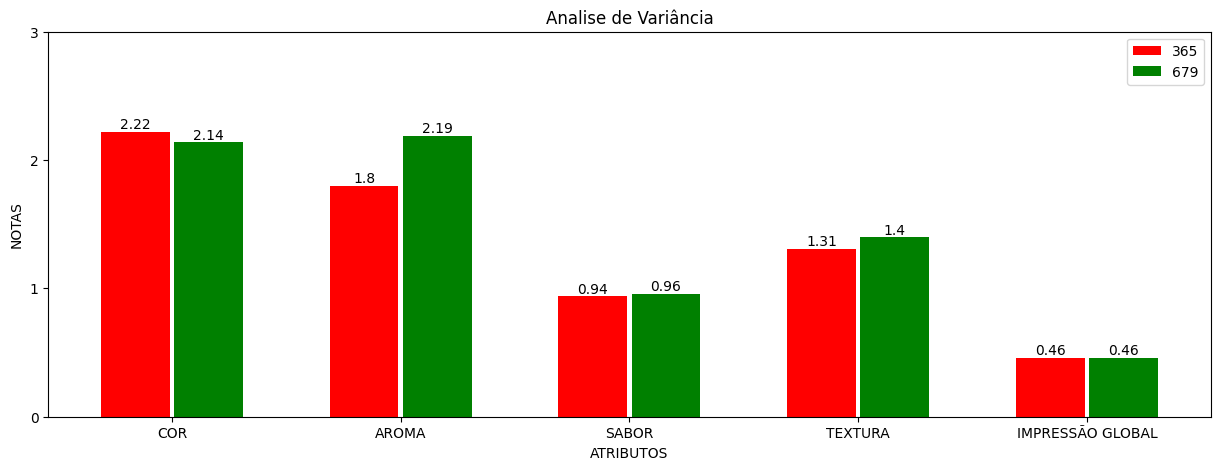

In [24]:
widht = 0.25
x = np.arange(5)
fig, ax = plt.subplots(figsize=[15,5])



p = ax.bar(x-0.16, var365, width=0.3, color="r")
v = ax.bar(x+0.16, var679, width=0.3, color="g")
ax.bar_label(p)
ax.bar_label(v)
ax.set_title('Analise de Variância')
plt.ylabel("NOTAS")
plt.xlabel('ATRIBUTOS')
plt.legend(['365', "679"])

plt.xticks(x, ["COR","AROMA", 'SABOR', "TEXTURA", "IMPRESSÃO GLOBAL" ])
plt.yticks([n for n in range(0,4)])
plt.show()

### Teste A/B Variância

Esse teste A/B será feito para ver diferença significativa entre a variância dos valores, para esse caso, vamos levar em conta valores acima de 0.05 como uma difereça significativa, e os abaixo como uma diferença menor relevante.

In [25]:
ab_test_v = list()
for i in range(len(var365)):
    ab_test_v.append(round(1 - var365[i] / var679[i], 2))

In [26]:
ab_test_v

[-0.04, 0.18, 0.02, 0.06, 0.0]

In [27]:
categories

['COR', 'AROMA', 'SABOR', 'TEXTURA', 'IMPRESSÃO GLOBAL']

In [28]:
AB_test_v = pd.DataFrame({"ATRIBUTOS": categories, "A/B": ab_test_v})

In [29]:
AB_test_v["A/B"].where(AB_test_v["A/B"] >=0, AB_test_v["A/B"] * (-1), inplace=True)

In [30]:
AB_test_v

,ATRIBUTOS,A/B
0,COR,0.04
1,AROMA,0.18
2,SABOR,0.02
3,TEXTURA,0.06
4,IMPRESSÃO GLOBAL,0.00


Text(0.5, 0, 'ATRIBUTOS')

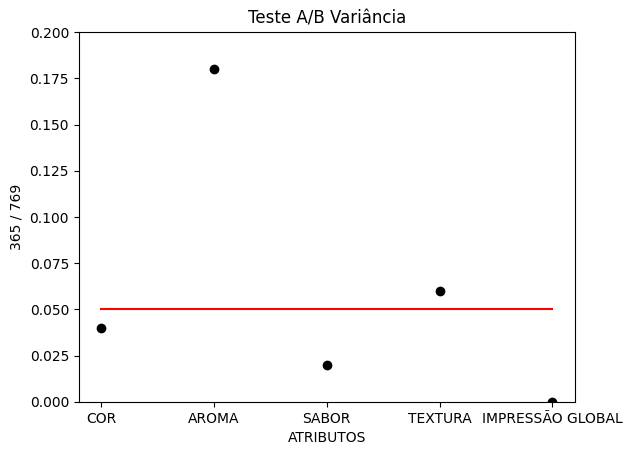

In [49]:
fig, ax = plt.subplots()

ax.scatter(categories, AB_test_v["A/B"], color='black')
ax.set(ylim=(0,0.2))
ax.axhline(y=0.5, color='r')
ax.set(title="Teste A/B Variância")
ax.plot(categories, [0.05] * 5, color="r")
plt.ylabel("365 / 769")
plt.xlabel('ATRIBUTOS')

## Comparativo de médias

Esse ponto visa somente analisar a média aritmética dos atributos. <br>
**Media Aritmética** <br>
A média aritmética é a soma dos valores dados aos atributos dividida pela quantidade de provadores.


In [15]:
df679.mean()

COR                   7.73
AROMA                 6.14
SABOR                 7.10
TEXTURA               7.51
IMPRESSÃO GLOBAL      7.35
INTENÇÃO DE COMPRA    4.32
dtype: float64

In [14]:
df365.mean()

COR                   7.82
AROMA                 6.24
SABOR                 7.89
TEXTURA               7.65
IMPRESSÃO GLOBAL      8.06
INTENÇÃO DE COMPRA    4.32
dtype: float64

In [32]:
media679 = list()
media679 = [df679.mean()[1], df679.mean()[2], df679.mean()[3], df679.mean()[4], df679.mean()[5]]
media365 = list()
media365 = [df365.mean()[1], df365.mean()[2], df365.mean()[3], df365.mean()[4], df365.mean()[5]]
media679, media365

([6.14, 7.1, 7.51, 7.35, 4.32], [6.24, 7.89, 7.65, 8.06, 4.32])

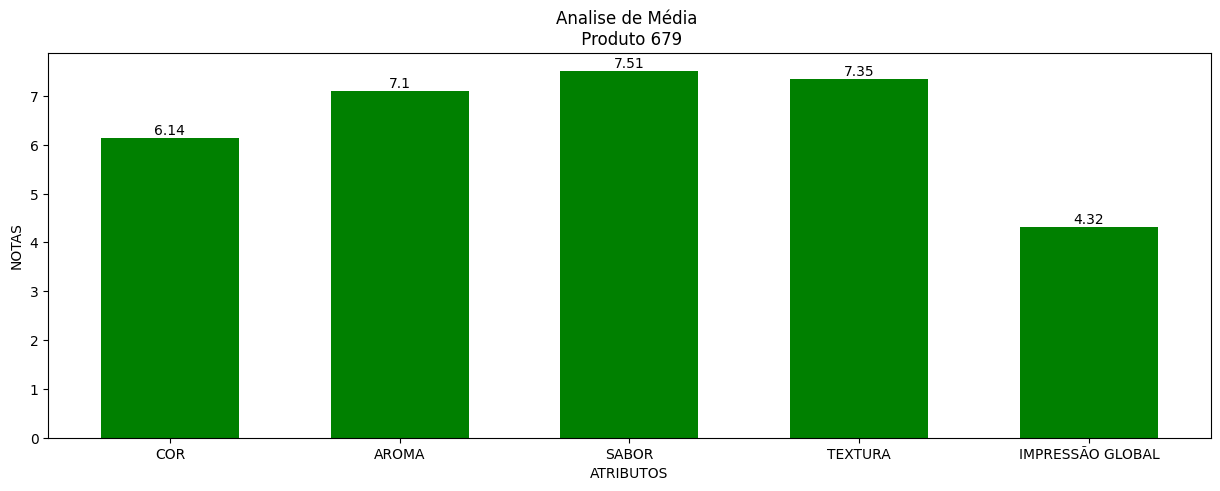

In [33]:
fig, ax = plt.subplots(figsize=[15,5])

p = ax.bar(categories, media679, width=0.6)
v = ax.bar(categories, var679, width=0.1, color="pink")
ax.bar(categories, media679, width=0.6, color="g")
#ax.bar(categories, var365, width=0.08, color="purple")
#ax.plot(categories, var365, color="black")
ax.bar_label(p)
#ax.bar_label(v)
ax.set_xlabel("ATRIBUTOS")
ax.set_ylabel("NOTAS")
ax.set_title("Analise de Média \n Produto 679")
plt.show()

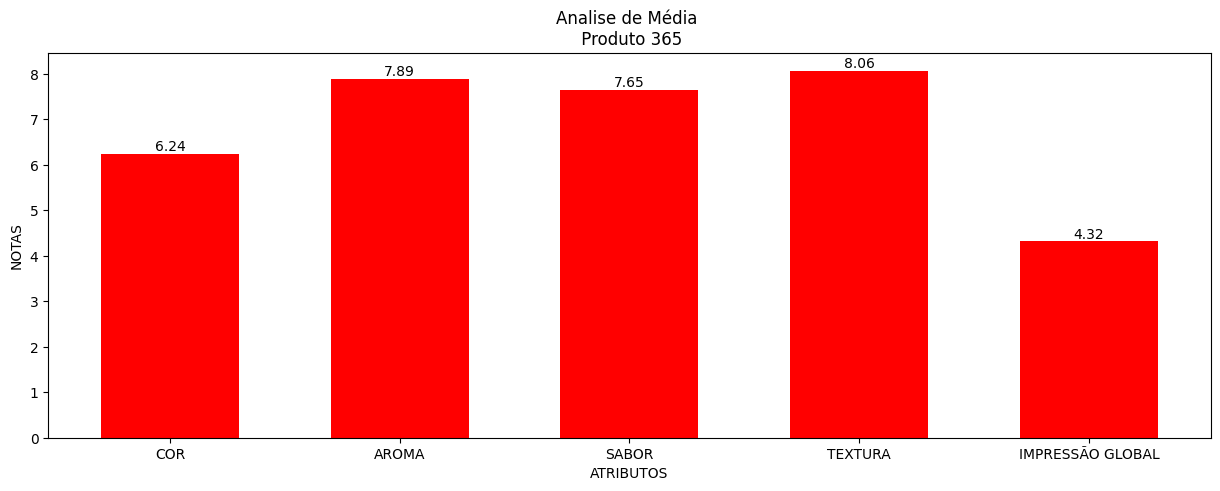

In [34]:
fig, ax = plt.subplots(figsize=[15,5])

p = ax.bar(categories, media365, width=0.6)
v = ax.bar(categories, var365, width=0.1, color="pink")
ax.bar(categories, media365, width=0.6, color="r")
#ax.bar(categories, var365, width=0.08, color="purple")
#ax.plot(categories, var365, color="black")
ax.bar_label(p)
#ax.bar_label(v)
ax.set_xlabel("ATRIBUTOS")
ax.set_ylabel("NOTAS")
ax.set_title("Analise de Média \n Produto 365")
plt.show()

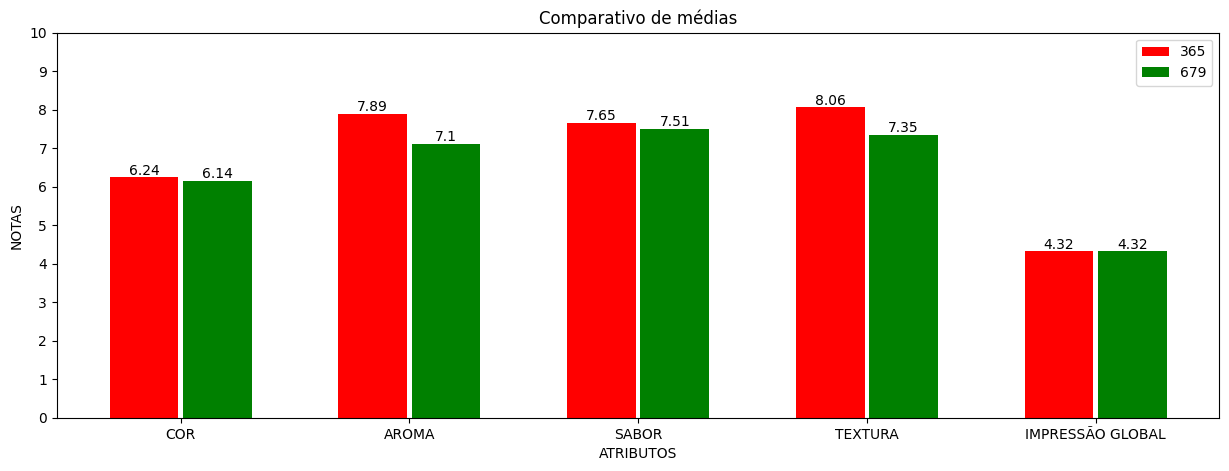

In [35]:
widht = 0.25
x = np.arange(5)
fig, ax = plt.subplots(figsize=[15,5])



p = ax.bar(x-0.16, media365, width=0.3, color="r")
v = ax.bar(x+0.16, media679, width=0.3, color="g")
ax.bar_label(p)
ax.bar_label(v)
ax.set_title('Comparativo de médias')
plt.ylabel("NOTAS")
plt.xlabel('ATRIBUTOS')
plt.legend(['365', "679"])

plt.xticks(x, ["COR","AROMA", 'SABOR', "TEXTURA", "IMPRESSÃO GLOBAL" ])
plt.yticks([n for n in range(0,11)])
plt.show()

# Optativo

### Teste A/B Média

Esse teste A/B será feito para ver diferença significativa entre a variância dos valores, para esse caso, vamos levar em conta valores acima de 0.05 como uma difereça significativa, e os abaixo como uma diferença menor relevante.

In [42]:
ab_test_m = list()
for i in range(len(var365)):
    ab_test_m.append(round(1 - media365[i] / media679[i], 2))

In [43]:
ab_test_m

[-0.02, -0.11, -0.02, -0.1, 0.0]

In [44]:
AB_test_m = pd.DataFrame({"ATRIBUTOS": categories, "A/B": ab_test_m})

In [45]:
AB_test_m["A/B"].where(AB_test_m["A/B"] >=0, AB_test_m["A/B"] * (-1), inplace=True)

In [46]:
AB_test_m

,ATRIBUTOS,A/B
0,COR,0.02
1,AROMA,0.11
2,SABOR,0.02
3,TEXTURA,0.10
4,IMPRESSÃO GLOBAL,0.00


Text(0.5, 0, 'ATRIBUTOS')

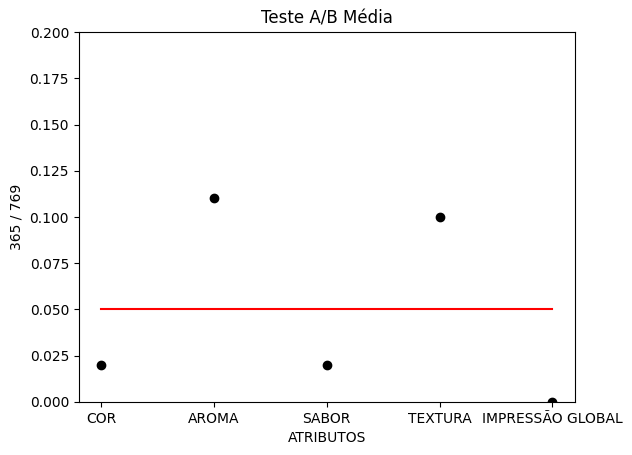

In [51]:
fig, ax = plt.subplots()

ax.scatter(categories, AB_test_m["A/B"], color='black')
ax.set(ylim=(0,0.2))
ax.axhline(y=0.5, color='r')
ax.set(title="Teste A/B Média")
ax.plot(categories, [0.05] * 5, color="r")
plt.ylabel("365 / 769")
plt.xlabel('ATRIBUTOS')

# Avaliação dos resultados

Cabe uma analise sobre os casos de Aroma e Textura que mostraram no teste A / B da analise de variância acima um valor acima de 0.05 que foi o valor da diferença mínima significativa